# Classification Algorithms

Problem Description :   
Use sklearn.datasets iris flower dataset to train your model using Classification models. You need    
to figure out the accuracy of your model and use that to predict different samples in your test      
dataset.    
In iris dataset there are 150 samples containing following features        
     
1. Sepal Length     
2. Sepal Width        
3. Petal length     
4. Petal width   
    
Using above 4 features you will classify a flower in one of the three categories,      
1. Setosa            
2. Versicolour          
3. Virginica        

In [360]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [217]:
import warnings
warnings.simplefilter(action='ignore')

In [218]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Category'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Data Exploration

In [219]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [220]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [221]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [222]:
df.size

750

In [223]:
df.shape

(150, 5)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Category           150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [225]:
df.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


#### Data cleaning

In [300]:
len(df[df.duplicated()])

0

In [301]:
df.drop_duplicates(inplace=True)

** No null values  
** deleted One Duplicate row

#### Splitting Dataset

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names],df["Category"], test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(119, 4)
(30, 4)


## CLASSIFICATION MODELS

## Supervised Learning

### 1. Logistic Regression Model

In [229]:
# Create logistic regression model

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, precision_score, recall_score, silhouette_score
LRmodel = LogisticRegression()

In [231]:
LRmodel.fit(X_train, Y_train)

LogisticRegression()

In [232]:
# Measure accuracy of our model
LR_predicted = LRmodel.predict(X_test)
print("Test Score :  ", LRmodel.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, LR_predicted), '\n')
LR_cm = confusion_matrix(Y_test, LR_predicted)
print("confusion_matrix : \n", LR_cm)
print(" \n F1 Score :  ", f1_score(Y_test, LR_predicted, average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, LR_predicted))

Test Score :   0.9333333333333333
Accuracy Score :   0.9333333333333333 

confusion_matrix : 
 [[12  0  0]
 [ 0 11  1]
 [ 0  1  5]]
 
 F1 Score :   0.9166666666666666

 Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        12
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



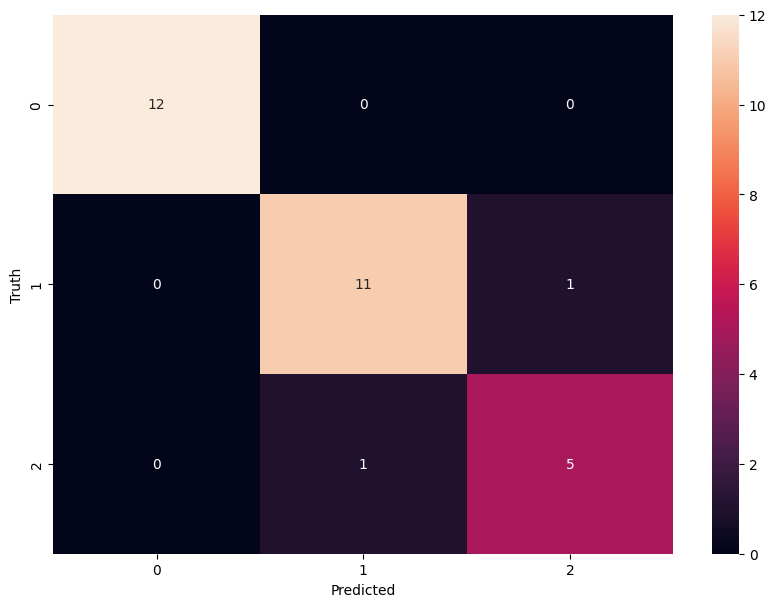

In [233]:
plt.figure(figsize = (10,7))
sns.heatmap(LR_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### 2. Decision Tree Model

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
DTmodel = DecisionTreeClassifier()

In [236]:
DTmodel.fit(X_train, Y_train)

DecisionTreeClassifier()

In [237]:
# Measure accuracy of our model
DT_predicted = DTmodel.predict(X_test)

print("Test Score :  ", DTmodel.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, DT_predicted), '\n')
DT_cm = confusion_matrix(Y_test, DT_predicted)
print("confusion_matrix : \n", DT_cm)
print(" \n F1 Score :  ", f1_score(Y_test, DT_predicted, average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, DT_predicted))

Test Score :   0.9
Accuracy Score :   0.9 

confusion_matrix : 
 [[12  0  0]
 [ 0 10  2]
 [ 0  1  5]]
 
 F1 Score :   0.8795986622073578

 Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.83      0.87        12
           2       0.71      0.83      0.77         6

    accuracy                           0.90        30
   macro avg       0.87      0.89      0.88        30
weighted avg       0.91      0.90      0.90        30



### Hyper Parameter Tuning of Decision Tree Model

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2'],
    'splitter':['best', 'random']
}
DTmodel = DecisionTreeClassifier()

grid_search = GridSearchCV(DTmodel, parameter, scoring='accuracy')
grid_search.fit(X_train, Y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [240]:
print("\n Best estimator:\n", grid_search.best_estimator_)
print("\n Best score:\n", grid_search.best_score_)
print("\n Best parameters:\n", grid_search.best_params_)


 Best estimator:
 DecisionTreeClassifier(max_depth=6, max_features='log2', splitter='random')

 Best score:
 0.9829710144927537

 Best parameters:
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'splitter': 'random'}


In [241]:
# Measure accuracy of our model

cv_model=grid_search.best_estimator_
DTmodel.fit(X_train, Y_train)
DT_predicted = cv_model.predict(X_test)

print("Test Score :  ", cv_model.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, DT_predicted), '\n')
DT_cm = confusion_matrix(Y_test, DT_predicted)
print("confusion_matrix : \n", DT_cm)
print(" \n F1 Score :  ", f1_score(Y_test, DT_predicted, average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, DT_predicted))

Test Score :   0.9333333333333333
Accuracy Score :   0.9333333333333333 

confusion_matrix : 
 [[12  0  0]
 [ 0 10  2]
 [ 0  0  6]]
 
 F1 Score :   0.9220779220779222

 Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.83      0.91        12
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.94        30



### 3. Random Forest Model

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, Y_train)

RandomForestClassifier()

In [244]:
# Measure accuracy of our model

RF_predicted = RFmodel.predict(X_test)

print("Test Score :  ", RFmodel.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, RF_predicted), '\n')
RF_cm = confusion_matrix(Y_test, RF_predicted)
print("confusion_matrix : \n", RF_cm)
print(" \n F1 Score :  ", f1_score(Y_test, RF_predicted, average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, RF_predicted))

Test Score :   0.9333333333333333
Accuracy Score :   0.9333333333333333 

confusion_matrix : 
 [[12  0  0]
 [ 0 11  1]
 [ 0  1  5]]
 
 F1 Score :   0.9166666666666666

 Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        12
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



### Hyper Parameter Tuning of Random Forest Model

In [245]:
parameter={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':np.arange(2,10,2),
    'max_features':[None,'sqrt','log2'],
    "bootstrap": [True, False]    
}

RFmodel = RandomForestClassifier()

grid_search = GridSearchCV(RFmodel, parameter, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [246]:
print("\n Best estimator:\n", grid_search.best_estimator_)
print("\n Best score:\n", grid_search.best_score_)
print("\n Best parameters:\n", grid_search.best_params_)


 Best estimator:
 RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10)

 Best score:
 0.9746376811594203

 Best parameters:
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}


In [247]:
# Measure accuracy of our model

cv_model=grid_search.best_estimator_
cv_model.fit(X_train, Y_train)
RF_predicted = cv_model.predict(X_test)

print("Test Score :  ", cv_model.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, RF_predicted), '\n')
RF_cm = confusion_matrix(Y_test, RF_predicted)
print("confusion_matrix : \n", RF_cm)
print(" \n F1 Score :  ", f1_score(Y_test, RF_predicted, average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, RF_predicted))

Test Score :   0.9
Accuracy Score :   0.9 

confusion_matrix : 
 [[12  0  0]
 [ 0 10  2]
 [ 0  1  5]]
 
 F1 Score :   0.8795986622073578

 Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.83      0.87        12
           2       0.71      0.83      0.77         6

    accuracy                           0.90        30
   macro avg       0.87      0.89      0.88        30
weighted avg       0.91      0.90      0.90        30



### 4. Ada Boost Model

In [248]:
from sklearn.ensemble import AdaBoostClassifier

In [249]:
ABmodel = AdaBoostClassifier()
ABmodel.fit(X_train, Y_train)

AdaBoostClassifier()

In [250]:
# Measure accuracy of our model

AB_predicted = ABmodel.predict(X_test)

print("Test Score :  ", ABmodel.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, AB_predicted), '\n')
AB_cm = confusion_matrix(Y_test, AB_predicted)
print("confusion_matrix : \n", AB_cm)
print(" \n F1 Score :  ", f1_score(Y_test, AB_predicted , average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, AB_predicted ))

Test Score :   0.9
Accuracy Score :   0.9 

confusion_matrix : 
 [[12  0  0]
 [ 0 11  1]
 [ 0  2  4]]
 
 F1 Score :   0.869090909090909

 Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      0.92      0.88        12
           2       0.80      0.67      0.73         6

    accuracy                           0.90        30
   macro avg       0.88      0.86      0.87        30
weighted avg       0.90      0.90      0.90        30



### 5. Gradient Boosting Model

In [251]:
from sklearn.ensemble import GradientBoostingClassifier

In [252]:
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, Y_train)

GradientBoostingClassifier()

In [253]:
# Measure accuracy of our model

GB_predicted = GBmodel.predict(X_test)

print("Test Score :  ", GBmodel.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, GB_predicted), '\n')
GB_cm = confusion_matrix(Y_test, GB_predicted)
print("confusion_matrix : \n", GB_cm)
print(" \n F1 Score :  ", f1_score(Y_test, GB_predicted , average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, GB_predicted ))

Test Score :   0.9333333333333333
Accuracy Score :   0.9333333333333333 

confusion_matrix : 
 [[12  0  0]
 [ 0 11  1]
 [ 0  1  5]]
 
 F1 Score :   0.9166666666666666

 Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        12
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



### 6. XGB Model

In [254]:
import xgboost as xgb

In [255]:
XGBmodel = xgb.XGBClassifier()
XGBmodel.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [256]:
# Measure accuracy of our model

XGB_predicted = XGBmodel.predict(X_test)

print("Test Score :  ", XGBmodel.score(X_test, Y_test))
print("Accuracy Score :  ", accuracy_score(Y_test, XGB_predicted), '\n')
XGB_cm = confusion_matrix(Y_test, XGB_predicted)
print("confusion_matrix : \n", XGB_cm)
print(" \n F1 Score :  ", f1_score(Y_test, XGB_predicted , average='macro'))
print("\n Classification Report :  \n", classification_report(Y_test, XGB_predicted ))

Test Score :   0.9
Accuracy Score :   0.9 

confusion_matrix : 
 [[12  0  0]
 [ 1 10  1]
 [ 0  1  5]]
 
 F1 Score :   0.8876328502415459

 Classification Report :  
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.83      0.87        12
           2       0.83      0.83      0.83         6

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



### 7. SVC Model

In [257]:
from sklearn.svm import SVC

In [258]:
SVCmodel = SVC()
SVCmodel.fit(X_train, Y_train)

SVC()

In [259]:
# Measure accuracy of our model

SVC_predicted = SVCmodel.predict(X_test)

print("Test Score :  ", SVCmodel.score(X_test, Y_test))
SVC_cm = confusion_matrix(Y_test, SVC_predicted)
print("confusion_matrix : \n", SVC_cm)
print(" \n F1 Score :  ", f1_score(Y_test, SVC_predicted , average='macro'))

Test Score :   0.9
confusion_matrix : 
 [[12  0  0]
 [ 0 10  2]
 [ 0  1  5]]
 
 F1 Score :   0.8795986622073578


### Hyper Parameter Tuning of Support Vector Model

In [260]:
parameter = {
    'C': [0.1, 1, 3, 10],          
    'gamma': [0.001, 0.01, 0.1],
    'degree': [2, 3, 4, 5],
    'kernel': ['linear','poly','rbf','sigmoid']
}

grid_search = GridSearchCV(SVCmodel, parameter, scoring='accuracy')
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 10], 'degree': [2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [261]:
print("\n Best estimator:\n", grid_search.best_estimator_)
print("\n Best score:\n", grid_search.best_score_)
print("\n Best parameters:\n", grid_search.best_params_)


 Best estimator:
 SVC(C=1, degree=2, gamma=0.001, kernel='linear')

 Best score:
 0.9916666666666668

 Best parameters:
 {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}


In [262]:
# Measure accuracy of our model

cv_model=grid_search.best_estimator_
cv_model.fit(X_train, Y_train)
SVC_predicted = cv_model.predict(X_test)

print("Test Score :  ", cv_model.score(X_test, Y_test))
SVC_cm = confusion_matrix(Y_test, SVC_predicted)
print("confusion_matrix : \n", SVC_cm)
print(" \n F1 Score :  ", f1_score(Y_test, SVC_predicted, average='macro'))

Test Score :   0.9333333333333333
confusion_matrix : 
 [[12  0  0]
 [ 0 10  2]
 [ 0  0  6]]
 
 F1 Score :   0.9220779220779222


In [263]:
# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, SVC_predicted, average='macro')
recall = recall_score(Y_test, SVC_predicted, average='macro')

print('Precision' , precision)
print('Recall', recall)


Precision 0.9166666666666666
Recall 0.9444444444444445


### 8. KNeighbors Model

In [264]:
from sklearn.neighbors import KNeighborsClassifier

In [265]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train, Y_train)

KNeighborsClassifier()

In [266]:
# Measure accuracy of our model

KNN_predicted = KNNmodel.predict(X_test)

print("Test Score : ",KNNmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, KNN_predicted))
print('Confusion Matrix:\n', confusion_matrix(Y_test, KNN_predicted))
print('F1 score : ', f1_score(Y_test, KNN_predicted, average='macro'))
print('Classification Report : \n', classification_report(Y_test, KNN_predicted))

Test Score :  0.8666666666666667
Accuracy_score :  0.8666666666666667
Confusion Matrix:
 [[12  0  0]
 [ 0  9  3]
 [ 0  1  5]]
F1 score :  0.8441558441558442
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.75      0.82        12
           2       0.62      0.83      0.71         6

    accuracy                           0.87        30
   macro avg       0.84      0.86      0.84        30
weighted avg       0.89      0.87      0.87        30



### Hyper Parameter Tuning of KNeighbors Model

In [267]:

# Create a KNN classifier
KNN = KNeighborsClassifier()

# Define the hyperparameter grid to search
parameter={
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance',None],  
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNN, parameter, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
print("\n Best estimator:\n", grid_search.best_estimator_)
print("\n Best score:\n", grid_search.best_score_)
print("\n Best parameters:\n", grid_search.best_params_)

# Get the best trained model
cv_model=grid_search.best_estimator_
cv_model.fit(X_train, Y_train)

# Make predictions on the test data using the best model
KNN_predicted = cv_model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(Y_test, KNN_predicted)
print('\n Accuracy with Best Model: ', accuracy)

print("\n Test Score : ",KNNmodel.score(X_test,Y_test))
print('\n Confusion Matrix:\n', confusion_matrix(Y_test, KNN_predicted))
print('\n F1 score : ', f1_score(Y_test, KNN_predicted, average='macro'))
print('\n Classification Report : \n', classification_report(Y_test, KNN_predicted))


 Best estimator:
 KNeighborsClassifier(n_neighbors=3)

 Best score:
 0.9916666666666668

 Best parameters:
 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}

 Accuracy with Best Model:  0.9

 Test Score :  0.8666666666666667

 Confusion Matrix:
 [[12  0  0]
 [ 0 10  2]
 [ 0  1  5]]

 F1 score :  0.8795986622073578

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.83      0.87        12
           2       0.71      0.83      0.77         6

    accuracy                           0.90        30
   macro avg       0.87      0.89      0.88        30
weighted avg       0.91      0.90      0.90        30



### 9. Naive Bayes

In [268]:
from sklearn.naive_bayes import GaussianNB

In [269]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, Y_train)

GaussianNB()

In [270]:
NB_predicted = NBmodel.predict(X_test)
mislabel = np.sum(Y_test != NB_predicted)
print("Total no of mislabelled datapoints :",mislabel)

print("Score : ",NBmodel.score(X_test,Y_test))
print("Accuracy_score : ",accuracy_score(Y_test, NB_predicted))
print('Confusion Matrix:\n', confusion_matrix(Y_test, NB_predicted))
print('F1 score : ', f1_score(Y_test, NB_predicted, average='macro'))
print(' Classification Report : \n',classification_report(NB_predicted, Y_test))

Total no of mislabelled datapoints : 1
Score :  0.9666666666666667
Accuracy_score :  0.9666666666666667
Confusion Matrix:
 [[12  0  0]
 [ 0 12  0]
 [ 0  1  5]]
F1 score :  0.9563636363636364
 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## UnSupervised Learning

In [276]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [304]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

###  K-means Clustering

In [305]:
from sklearn.cluster import KMeans

In [306]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

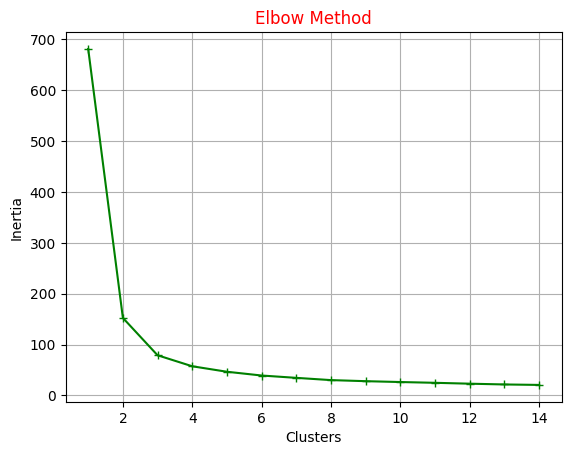

In [307]:
plt.plot(range(1,15),wcss,"-+", color='g')
plt.title("Elbow Method", color='r')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [308]:
kmeans = KMeans(n_clusters=2)
kmeans_predicted = kmeans.fit_predict(iris.data)
print(kmeans_predicted)

silhouette_score(iris.data, kmeans_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


0.6810461692117462

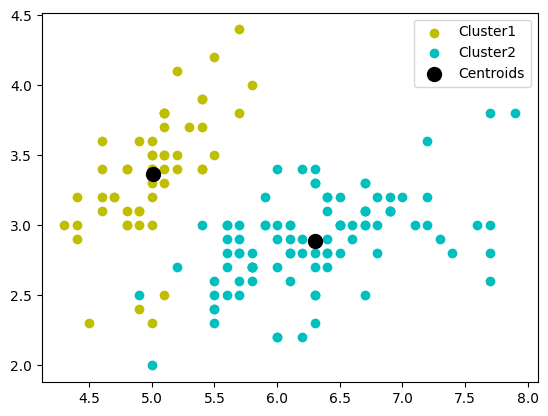

In [315]:
plt.scatter(iris.data[kmeans_predicted == 0, 0], iris.data[kmeans_predicted == 0, 1], color = 'y', label = 'Cluster1')
plt.scatter(iris.data[kmeans_predicted == 1, 0], iris.data[kmeans_predicted == 1, 1], color = 'c', label = 'Cluster2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()

In [316]:
kmeans = KMeans(n_clusters=3)
kmeans_predicted = kmeans.fit_predict(iris.data)
print(kmeans_predicted)

silhouette_score(iris.data, kmeans_predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


0.5528190123564095

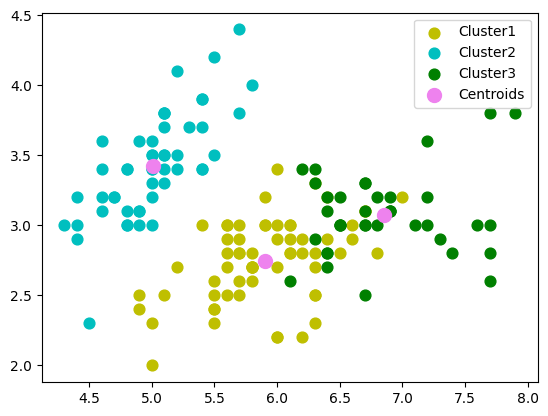

In [324]:
plt.scatter(iris.data[kmeans_predicted == 0, 0], iris.data[kmeans_predicted == 0, 1], s = 60, c = 'y', label = 'Cluster1')
plt.scatter(iris.data[kmeans_predicted == 1, 0], iris.data[kmeans_predicted == 1, 1], s = 60, c = 'c', label = 'Cluster2')
plt.scatter(iris.data[kmeans_predicted == 2, 0], iris.data[kmeans_predicted == 2, 1], s = 60, c = 'g', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'violet', label = 'Centroids')

plt.legend() 
plt.show()

### Hierarchical Clustering

In [329]:
from sklearn.cluster import AgglomerativeClustering

In [333]:
HC = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

HC_predicted = HC.fit_predict(iris.data)
print(HC_predicted)

silhouette_score(iris.data, HC_predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


0.6867350732769777

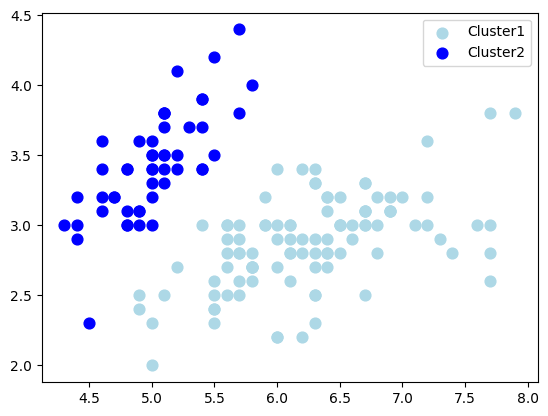

In [337]:
plt.scatter(iris.data[HC_predicted == 0, 0], iris.data[HC_predicted == 0, 1], s = 60, color = 'lightblue', label = 'Cluster1')
plt.scatter(iris.data[HC_predicted == 1, 0], iris.data[HC_predicted == 1, 1], s = 60, color = 'blue', label = 'Cluster2')

plt.legend() 
plt.show()

### t-SNE

In [356]:
from sklearn.manifold import TSNE

In [357]:
# Min Max Scaling

from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data

df[df.columns]=scaled_data.round(2)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,0.22,0.62,0.07,0.04,0.0
1,0.17,0.42,0.07,0.04,0.0
2,0.11,0.50,0.05,0.04,0.0
3,0.08,0.46,0.08,0.04,0.0
4,0.19,0.67,0.07,0.04,0.0
...,...,...,...,...,...
145,0.67,0.42,0.71,0.92,1.0
146,0.56,0.21,0.68,0.75,1.0
147,0.61,0.42,0.71,0.79,1.0
148,0.53,0.58,0.75,0.92,1.0


In [358]:
#Apply the TSNE algorithm with random state = 1

for i in range(10,50):
    tsne = TSNE(n_components = 2, random_state=1, perplexity=i)  
    data_tsne = tsne.fit_transform(scaled_data)

#Fit and transform tsne function on the scaled data
data_tsne

array([[-1.31928053e+01,  1.58405447e+00],
       [-1.23699579e+01,  1.24982870e+00],
       [-1.25631475e+01,  1.75205564e+00],
       [-1.23745670e+01,  1.68911493e+00],
       [-1.33044329e+01,  1.78876173e+00],
       [-1.38721409e+01,  1.38166821e+00],
       [-1.28004637e+01,  1.92537272e+00],
       [-1.29769020e+01,  1.62126648e+00],
       [-1.20902252e+01,  1.62028682e+00],
       [-1.24799366e+01,  1.26536298e+00],
       [-1.36389132e+01,  1.26478291e+00],
       [-1.28952408e+01,  1.80653763e+00],
       [-1.23016272e+01,  1.37801313e+00],
       [-1.21484804e+01,  1.79560363e+00],
       [-1.40749760e+01,  1.31532037e+00],
       [-1.43218241e+01,  1.48746085e+00],
       [-1.38674746e+01,  1.38305998e+00],
       [-1.32014055e+01,  1.38803911e+00],
       [-1.38680191e+01,  1.19487703e+00],
       [-1.36154947e+01,  1.71180630e+00],
       [-1.32074814e+01,  1.00706482e+00],
       [-1.35254841e+01,  1.64966118e+00],
       [-1.30941458e+01,  2.06504512e+00],
       [-1.

In [359]:
data_tsne.shape

(149, 2)

#### 2 Dimensional

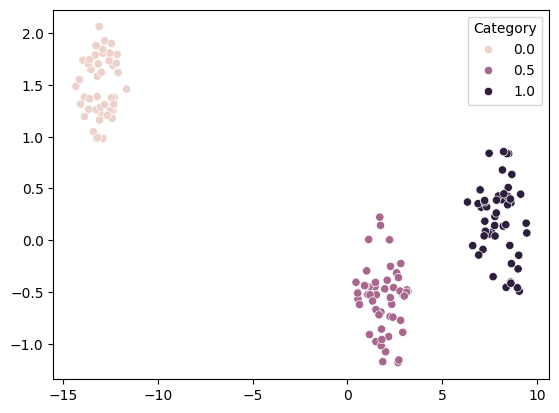

In [361]:
sns.scatterplot(x=data_tsne[:,0],y=data_tsne[:,1], hue='Category', data=df)
plt.show()

In [352]:
#Apply the TSNE algorithm with random state = 1
for i in range(10,50):
    tsne = TSNE(n_components = 1, random_state=1,perplexity=i)  
    data_tsne = tsne.fit_transform(scaled_data)

#Fit and transform tsne function on the scaled data
data_tsne.shape

(149, 1)

#### 1 Dimensional

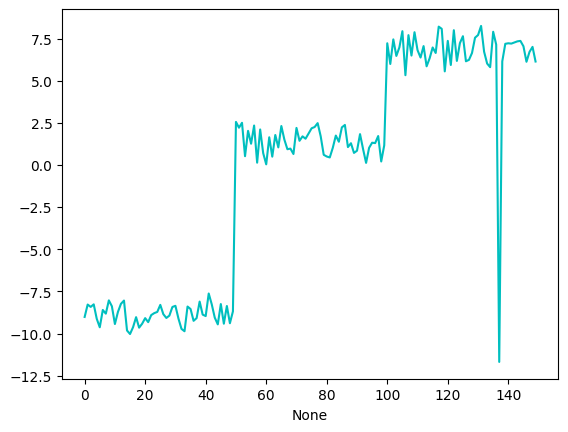

In [355]:
sns.lineplot(x=df.index, y=data_tsne[:,0], c= 'c', data=df)
plt.show()